In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns

%pylab inline

#rcParams['axes.spines.right'] = False
#rcParams['axes.spines.top'] = False

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
puck_number = '190926_11'
puck_data_path = 'data/Puck_{}'.format(puck_number)

In [3]:
df_meta = pd.read_csv("{}/BeadLocationsForR.csv".format(puck_data_path))
print(df_meta.shape)
df_meta.head(3)

(43617, 3)


,barcodes,xcoord,ycoord
0,AATCAACTTTTTTT,3848.023256,1205.232558
1,CAACCGTGGTTTTC,4515.945055,4332.978022
2,GACTGAATAGCTTT,3431.261538,3989.923077


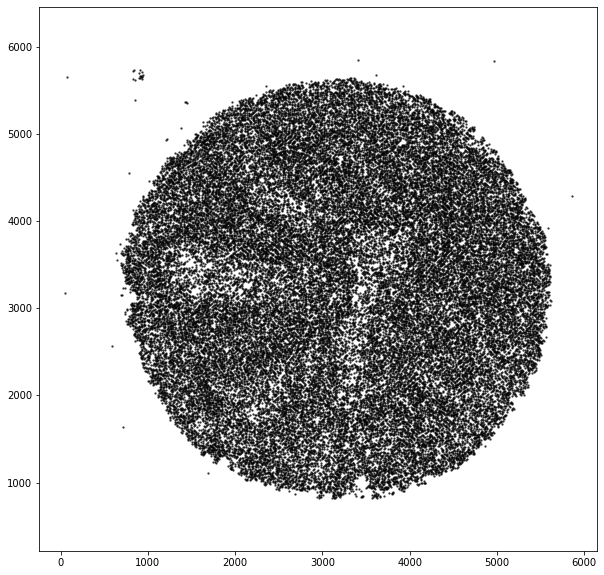

In [4]:
plt.figure(figsize = (10, 10))
plt.scatter(df_meta['xcoord'], df_meta['ycoord'], c='k', s=2, alpha=0.6)
plt.axis('equal')
#save_result("tissue_coverage")
plt.show()

In [5]:
dge = pd.read_csv("{}/MappedDGEForR.csv".format(puck_data_path))
dge = dge.set_index('Row')
print(dge.shape)
dge.head(3)

(22620, 43617)


,AATCAACTTTTTTT,CAACCGTGGTTTTC,GACTGAATAGCTTT,CAACAAGTATTGTT,GGGCAACTGATCTT,CGCAAGTGTCTCTC,TGCGTCCACATCTG,TCCAAAGGAATCTT,CCCCAACCCCGCTG,GTCTGGCATGTATT,...,GTCCGAGGCAAAAC,TACTTCACCAAAAG,GCACTAAACAAAAC,CTGCTTAGAAGACA,CATCTCAAAGATAA,CATAAAAAAAAAAA,AAAATAAAAAAAAA,TCGAAAAAAAAAAA,TGCAAAAAAAAAAA,AGAAAAAAAAAAAA
Row,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dgeT = dge.T
print(dgeT.shape)
dgeT.head(5)

(43617, 22620)


Row,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,n-R5-8s1,n-R5s173,n-R5s25,n-R5s29,n-R5s40
AATCAACTTTTTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAACCGTGGTTTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACTGAATAGCTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAACAAGTATTGTT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGGCAACTGATCTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dge1 = dgeT.copy()
dge1 = dge1.reset_index()
dge1 = dge1.rename(columns={'index':'barcode'})
print(dge1.shape)
dge1.head()

(43617, 22621)


Row,barcode,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,n-R5-8s1,n-R5s173,n-R5s25,n-R5s29,n-R5s40
0,AATCAACTTTTTTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CAACCGTGGTTTTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GACTGAATAGCTTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CAACAAGTATTGTT,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GGGCAACTGATCTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


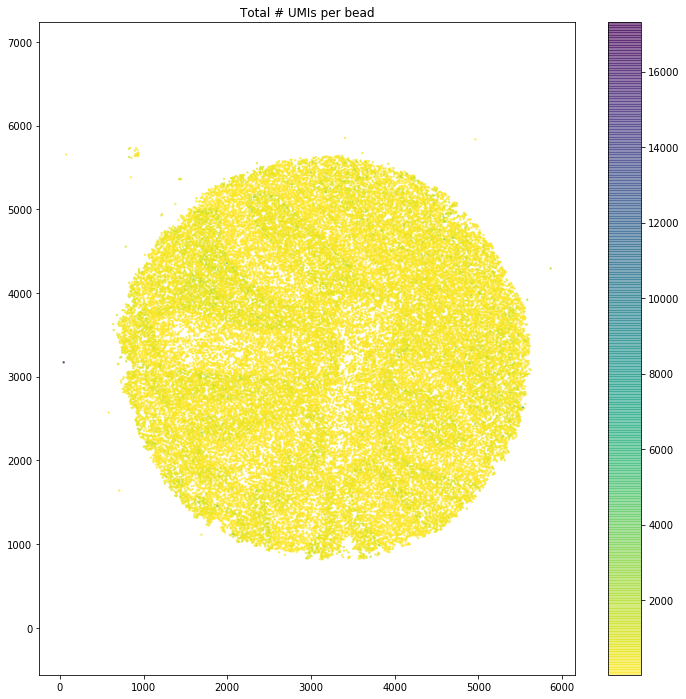

In [13]:
plt.figure(figsize(12, 12))
pyplot.set_cmap('viridis_r')
plt.scatter(df_meta['xcoord'], df_meta['ycoord'], 
            c=np.sum(dge1.drop(['barcode'], axis=1), axis=1), 
            s=2, alpha=0.6)
plt.colorbar()
plt.axis('equal')
plt.title("Total # UMIs per bead")
plt.show()

In [9]:
df_meta_clean = df_meta.query('(xcoord-3200)*(xcoord-3200)+(ycoord-3200)*(ycoord-3200)<=2500*2500')
df_meta_clean = df_meta_clean.rename(columns={'barcodes':'barcode',
                                             'xcoord':'x',
                                             'ycoord':'y'})
print(df_meta_clean.shape)
df_meta_clean.head(3)

(43547, 3)


,barcode,x,y
0,AATCAACTTTTTTT,3848.023256,1205.232558
1,CAACCGTGGTTTTC,4515.945055,4332.978022
2,GACTGAATAGCTTT,3431.261538,3989.923077


In [10]:
df_merged = dge1.merge(df_meta_clean, right_on='barcode', left_on='barcode')

In [11]:
def plot_one_gene(gene):
    plt.figure(figsize(10, 10))
    pyplot.set_cmap('viridis_r')
    plt.scatter(df_meta_clean['x'], df_meta_clean['y'], 
                c=df_merged[gene], s=2, alpha=0.6)
    plt.axis('equal')
    plt.title('{}'.format(gene))
    plt.colorbar()
    plt.show()

['Pcp4']


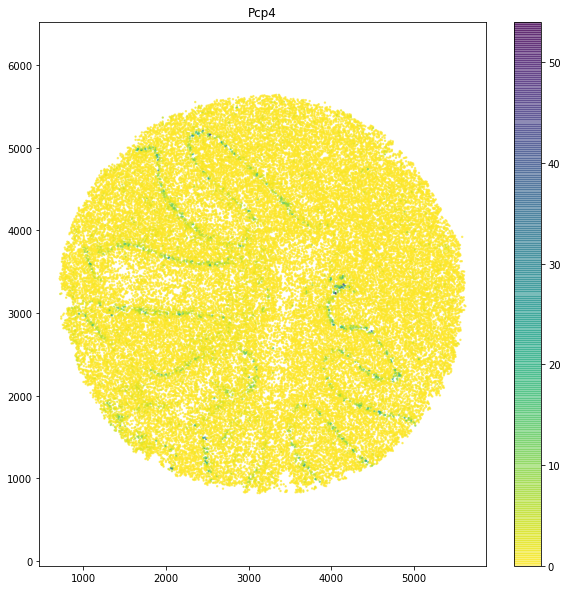

In [14]:
# Purkinje markers
interesting_genes = ['Pcp4']
print(interesting_genes)
for g in interesting_genes:
    plot_one_gene(gene=g)

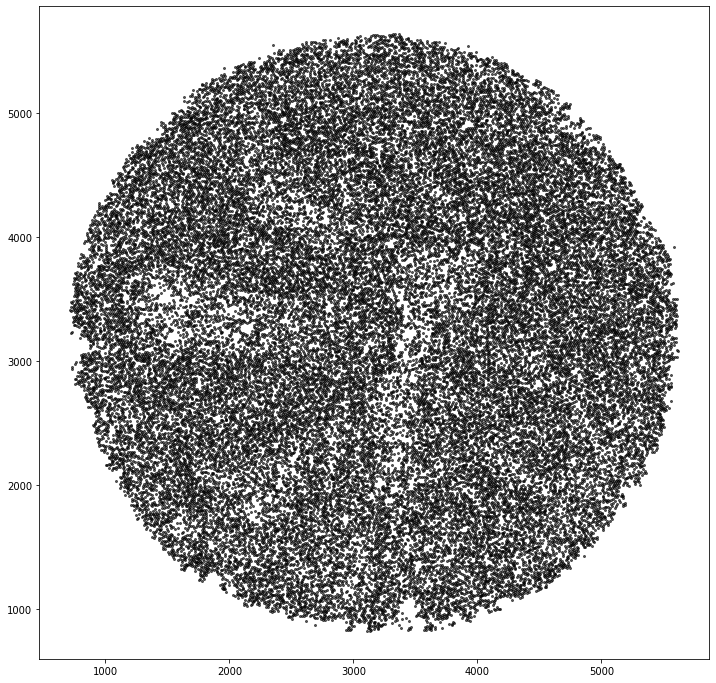

In [15]:
plt.figure(figsize(12, 12))
plt.scatter(df_meta_clean['x'], df_meta_clean['y'], 
            c='k', s=4, alpha=0.6)
plt.axis('equal')
plt.show()
#save_result("cleaned_tissue_coverage")

In [25]:
df_meta_clean.to_csv("{}/coords.csv".format(puck_data_path), index=False)
print(df_meta_clean.shape)
df_meta_clean.head()

(43547, 3)


,barcode,x,y
0,AATCAACTTTTTTT,3848.023256,1205.232558
1,CAACCGTGGTTTTC,4515.945055,4332.978022
2,GACTGAATAGCTTT,3431.261538,3989.923077
3,CAACAAGTATTGTT,4475.911392,3376.987342
4,GGGCAACTGATCTT,3180.948276,2501.396552


In [17]:
df_merged = dge1.merge(df_meta_clean, right_on='barcode', left_on='barcode')
counts = df_merged.drop(['x', 'y'], axis=1)
counts.to_csv("{}/counts.csv".format(puck_data_path), index=False)
print(counts.shape)
counts.head(5)

(43547, 22621)


,barcode,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,n-R5-8s1,n-R5s173,n-R5s25,n-R5s29,n-R5s40
0,AATCAACTTTTTTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CAACCGTGGTTTTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GACTGAATAGCTTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CAACAAGTATTGTT,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GGGCAACTGATCTT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Filter out beads with low num UMIs for Colab

In [18]:
barcodestotals = np.sum(counts.drop('barcode', axis=1), axis=1)
print(barcodestotals.shape)

(43547,)


In [19]:
df_meta_barcodestotals = df_meta_clean.copy()
df_meta_barcodestotals['total_counts'] = barcodestotals
df_meta_barcodestotals.head()

,barcode,x,y,total_counts
0,AATCAACTTTTTTT,3848.023256,1205.232558,20.0
1,CAACCGTGGTTTTC,4515.945055,4332.978022,499.0
2,GACTGAATAGCTTT,3431.261538,3989.923077,177.0
3,CAACAAGTATTGTT,4475.911392,3376.987342,405.0
4,GGGCAACTGATCTT,3180.948276,2501.396552,35.0


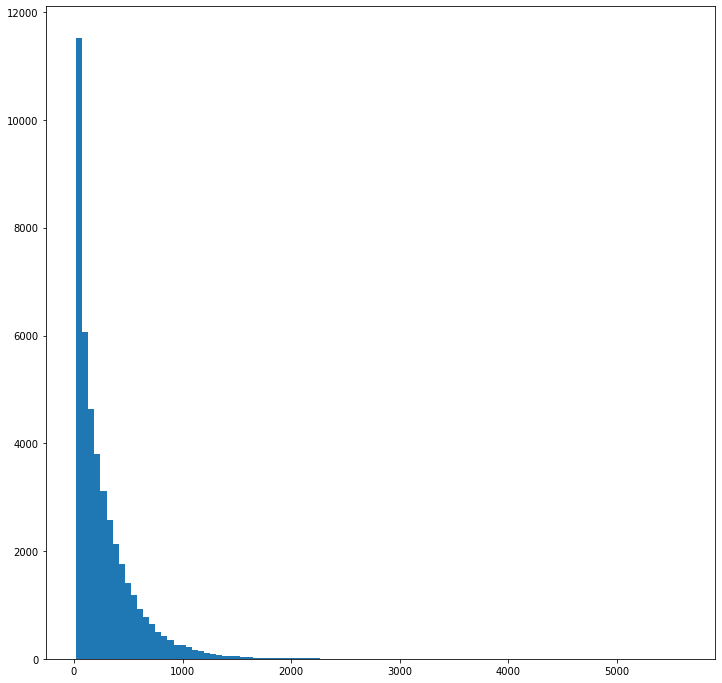

In [21]:
plt.hist(barcodestotals, bins=100)
plt.show()

In [25]:
np.sum(df_meta_barcodestotals['total_counts']>300)

14374

In [26]:
df_meta_gr300 = df_meta_barcodestotals.loc[df_meta_barcodestotals['total_counts']>300]
print(df_meta_gr300.shape)
df_meta_gr300.head()

(14374, 4)


,barcode,x,y,total_counts
1,CAACCGTGGTTTTC,4515.945055,4332.978022,499.0
3,CAACAAGTATTGTT,4475.911392,3376.987342,405.0
5,CGCAAGTGTCTCTC,2914.104478,1669.805970,392.0
7,TCCAAAGGAATCTT,3682.627451,4084.882353,806.0
9,GTCTGGCATGTATT,2547.947368,2437.736842,1215.0


In [28]:
coords_gr300 = df_meta_gr300.drop('total_counts', axis=1)
coords_gr300.to_csv("{}/coords_gr300.csv".format(puck_data_path), index=False)
print(coords_gr300.shape)
coords_gr300.head()

(14374, 3)


,barcode,x,y
1,CAACCGTGGTTTTC,4515.945055,4332.978022
3,CAACAAGTATTGTT,4475.911392,3376.987342
5,CGCAAGTGTCTCTC,2914.104478,1669.805970
7,TCCAAAGGAATCTT,3682.627451,4084.882353
9,GTCTGGCATGTATT,2547.947368,2437.736842


In [29]:
df_merged_gr300 = counts.merge(coords_gr300, right_on='barcode', left_on='barcode')
counts_gr300 = df_merged_gr300.drop(['x', 'y'], axis=1)
counts_gr300.to_csv("{}/counts_gr300.csv".format(puck_data_path), index=False)
print(counts_gr300.shape)
counts_gr300.head(5)

(14374, 22621)


,barcode,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,n-R5-8s1,n-R5s173,n-R5s25,n-R5s29,n-R5s40
0,CAACCGTGGTTTTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CAACAAGTATTGTT,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CGCAAGTGTCTCTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCCAAAGGAATCTT,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,GTCTGGCATGTATT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
